In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Violence or Non-violence
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
   r"C:\new_violence",  # Replace with the path to your dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

Found 11073 images belonging to 2 classes.


In [ ]:
model.fit(train_generator, epochs=20)


Epoch 1/10
347/347 [==============================] - 373s 1s/step - loss: 0.6327 - accuracy: 0.6323
Epoch 2/10
 59/347 [====>.........................] - ETA: 5:18 - loss: 0.4932 - accuracy: 0.7654

Found 11073 images belonging to 2 classes.
347/347 [==============================] - 379s 1s/step - loss: 0.5863 - accuracy: 0.6750


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


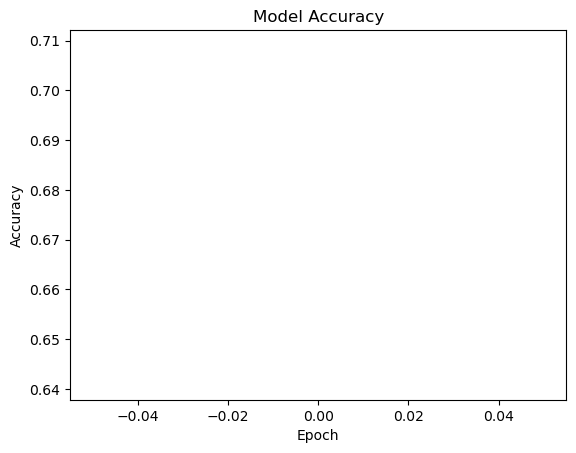

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification: Violence or Non-violence
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load the dataset using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    r"C:\new_violence",  # Path to the dataset
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

# Train the model
history = model.fit(train_generator, epochs=1)

# Save the model
model.save('violence_detection_model.h5')

# Plot the training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [1]:
model.save('violence_detection_model.h5')

NameError: name 'model' is not defined

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('violence_detection_model.h5')

# Create a VideoCapture object for the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Preprocess the frame
    frame = cv2.resize(frame, (224, 224))
    frame = np.expand_dims(frame, axis=0)  # Add batch dimension
    frame = frame.astype('float32') / 255.0

    # Make predictions
    prediction = model.predict(frame)

    # Display the result on the frame
    label = "Violence" if prediction[0][0] > 0.5 else "Non-Violence"
    color = (0, 0, 255) if prediction[0][0] > 0.5 else (0, 255, 0)

    cv2.putText(frame[0], label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.imshow('Violence Detection', frame[0])

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step
